In [ ]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [ ]:
#!wget --no-check-certificate https://storage.googleapis.com/tensorflow/keras-applications/mobilenet_v2/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5 -O wts.h5

In [ ]:
#base_model = tf.keras.applications.MobileNetV2(input_shape=(150,150,3)include_top=False, weights=None)
 #base_model.load_weights('/content/wts.h5')

IndentationError: ignored

In [ ]:
# base_model=tf.keras.applications.VGG16(
#     include_top=True, weights='imagenet', input_tensor=None, input_shape=None,
#     pooling=None, classes=1000, classifier_activation='softmax'
# )

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
# load model
base_model = InceptionV3(input_shape=(299,299,3))


In [ ]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_470 (Conv2D)             (None, 149, 149, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_476 (BatchN (None, 149, 149, 32) 96          conv2d_470[0][0]                 
__________________________________________________________________________________________________
activation_470 (Activation)     (None, 149, 149, 32) 0           batch_normalization_476[0][0]    
_______________________________________________________________________________________

In [ ]:
base_model.trainable=False

In [ ]:
last_layer=base_model.get_layer('mixed7')
print("Last-Layer Output Shape - ",last_layer.output_shape)
last_out=last_layer.output

Last-Layer Output Shape -  (None, 17, 17, 768)


In [ ]:
class myCB(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.93):
      print("\nReached 99% Accuracy.... Model Successfully Trained")
      self.model.stop_training=True
    
cb=myCB()

In [ ]:
#lay=layers.BatchNormalization()(last_out)
lay=tf.keras.layers.Flatten()(last_out)
#lay=layers.Dense(512,activation='relu')(last_out)
lay=layers.Dense(256,activation='relu')(lay)
lay=layers.Dropout(0.2)(lay)
lay=layers.Dense(2,activation='softmax')(lay)

model=Model(base_model.input,lay)
#model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),metrics=['accuracy'])

model.summary()

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_470 (Conv2D)             (None, 149, 149, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_476 (BatchN (None, 149, 149, 32) 96          conv2d_470[0][0]                 
__________________________________________________________________________________________________
activation_470 (Activation)     (None, 149, 149, 32) 0           batch_normalization_476[0][0]    
___________________________________________________________________________________________

In [ ]:
!unzip /content/dataset.zip

In [ ]:
train_dir = '/content/dataset'

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   rotation_range = 90,
                                   width_shift_range = 0.3,
                                   height_shift_range = 0.3,
                                   shear_range = 0.3,
                                   zoom_range = 0.3,
                                   horizontal_flip = True,
                                   fill_mode='nearest')
train_gen = train_datagen.flow_from_directory(train_dir,batch_size=30,class_mode='categorical',target_size=(299,299))


Found 186 images belonging to 2 classes.


In [ ]:
# for i in range(10):
#     lr=10**(-i);
#     model.compile(loss ='mean_squared_error',optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr),metrics=['accuracy'])
#     history = model.fit(train_gen,epochs=1,callbacks=[cb])



In [ ]:
model.compile(loss ='categorical_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=(2e-5)),metrics=['accuracy'])
    
history = model.fit(train_gen,epochs=25,callbacks=[cb])

Epoch 1/25
7/7 [==============================] - 33s 5s/step - loss: 1.1416 - accuracy: 0.5108
Epoch 2/25
7/7 [==============================] - 32s 5s/step - loss: 0.5604 - accuracy: 0.7312
Epoch 3/25
7/7 [==============================] - 33s 5s/step - loss: 0.4794 - accuracy: 0.7796
Epoch 4/25
7/7 [==============================] - 37s 5s/step - loss: 0.4794 - accuracy: 0.7903
Epoch 5/25
7/7 [==============================] - 32s 5s/step - loss: 0.4292 - accuracy: 0.8226
Epoch 6/25
7/7 [==============================] - 32s 5s/step - loss: 0.3493 - accuracy: 0.8602
Epoch 7/25
7/7 [==============================] - 32s 5s/step - loss: 0.5553 - accuracy: 0.7688
Epoch 8/25
7/7 [==============================] - 37s 5s/step - loss: 0.3820 - accuracy: 0.8387
Epoch 9/25
7/7 [==============================] - 32s 5s/step - loss: 0.3389 - accuracy: 0.8871
Epoch 10/25
7/7 [==============================] - 32s 5s/step - loss: 0.3013 - accuracy: 0.8817
Epoch 11/25
7/7 [======================

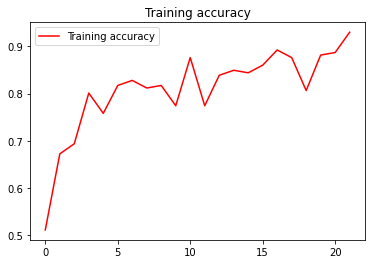

<Figure size 432x288 with 0 Axes>

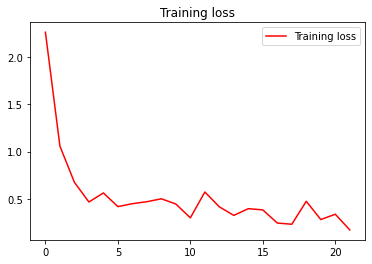

<Figure size 432x288 with 0 Axes>

In [ ]:

import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
model.save('acne-model.h5')

In [ ]:
#model=tf.keras.models.load_model('/content/acne-model.h5')
from tensorflow.keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/dataset/No/no acne7.jpg', target_size=(299,299))
x1 = image.img_to_array(img1)
x1 = np.expand_dims(x1, axis=0)

images1 = np.vstack([x1])
val1=model.predict(images1)

img2 = image.load_img('/content/dataset/Yes/acne 19.jpg', target_size=(299,299))
x2 = image.img_to_array(img2)
x2 = np.expand_dims(x2, axis=0)

images2 = np.vstack([x2])
val2=model.predict(images2)
# img1 = image.load_img('/content/dataset/No/no acne7.jpg', target_size=(150,150))
# img2 = image.load_img('/content/dataset/Yes/a23.jpg', target_size=(150,150))
# val1=model.predict(img1)
# val2=model.predict(img2)

print(val1)
print(val2)

[[1. 0.]]
[[1. 0.]]


In [ ]:
print(val)
# if val[0]>0.7:
#     print("Yes")
# else:
#     print("No")

In [ ]:
#from tensorflow.contrib import lite
converter = tf.lite.TFLiteConverter.from_keras_model( model)
model = converter.convert()
file = open( 'model(inception-softmax).tflite' , 'wb' ) 
file.write( model )
